# Hypothesis Testing


In [2]:
!pip install scipy==1.9.1 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 MB 33.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.6.1
    Uninstalling scipy-1.6.1:
      Successfully uninstalled scipy-1.6.1


In [3]:
import scipy
scipy.__version__

'1.9.1'

In [4]:
# importing the important packages
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  

%matplotlib inline

import scipy.stats as stats  

An E-commerce company's dataset has a mean delivery time of 5 days for their products with a standard deviation of 1.3 days.

The new customer service manager of the company is afraid that the company is slipping and collects a random sample of 45 orders. The mean delivery time of these samples comes out to be 5.25 days. 

We will determine if there is enough statistical evidence for the manager’s apprehension that the mean delivery time of products is greater than 5 days.

We will use level of significance $\alpha$ = 0.05

### Z-test assumptions

* Samples are drawn from a normal distribution - Since the sample size is 45(which is > 30), Central Limit Theorem states that the distribution of sample means will be normal. If the sample size was less than 30, we would have been able to apply the z test if we knew that the population distribution was normal.  
* Observations are from a simple random sample - we are informed that the manager collected a simple random sample
* Standard deviation is known - Yes

### Finding Z test statistic

In [5]:
# setting the values of population mean and population standard deviation to 5 and 1.3 respectively
mu, sigma = 5, 1.3

# set the value of sample mean to 5.25
x_bar = 5.25

# calculate the test statistic
test_stat = (x_bar - mu) / (sigma/np.sqrt(45))
test_stat

1.2900392177883402

x_bar mean is 1.3 standard deviations away from the population mean

#### The Z test statistic follows a standard normal distribution.

Let's plot the distribution of the Z test statistic and see where the computed test statistic lies in the plot.

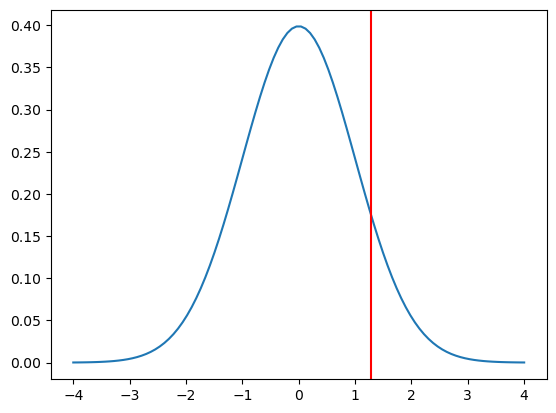

In [6]:
# import the required function
from scipy.stats import norm

# plotting the distribution of Z test statistic along with the test statistic to better visualize the calculations
x = np.linspace(-4, 4, 100)
plt.plot(x, norm.pdf(x, 0, 1))
plt.axvline(x = test_stat, c = 'r')
plt.show()

In [7]:
1 - norm.cdf(test_stat)

0.09851852092578695

### Rejection Acceptance Region/ p-value

Though the probability is small, we can not conclude whether the evidence is significant enough to reject the null hypothesis in favor of alternate hypothesis or not. To determine it, we use either one of the following approaches:

1- Rejection region approach

2- p-value approach

#### Rejection Region Approach

For this approach, we need to follow the below steps.


1.   We choose a value of the level of significance ($\alpha$).

     ($\alpha$ is the probability of rejecting the null hypothesis if it is true.)

2.   Then, we find the rejection region in the graph.

3.   We reject the null hypothesis if the test statistic falls in the rejection region. Else, we don't reject the null hypothesis.

In the given example, the Z test statistic follows a standard normal distribution as shown in the above plot. The Z values lying at the right end of the distribution give strong evidence against the null hypothesis. To find the rejection region, we will find the value of Z (called critical value) that gives an area of $\alpha$ to the right end.

In [8]:
from scipy.stats import norm

# finding the critical value
critical_val = norm.ppf(1-.05)
critical_val

1.6448536269514722

The critical value separates the region where we will reject the null hypothesis from the region where we won't reject the null hypothesis. See the below plot.

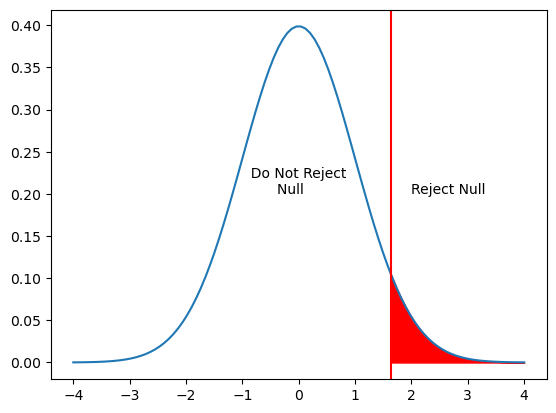

In [9]:
# plotting the test statistic distribution and indicating the rejection and acceptance region
x = np.linspace(-4, 4, 100)
plt.plot(x, norm.pdf(x, 0, 1))
plt.axvline(x = critical_val, c = 'r')
x1 = np.linspace(critical_val, 4, 50)
plt.fill_between(x1, norm.pdf(x1, 0, 1), color='r')
plt.annotate('Reject Null', (2, 0.20))
plt.annotate('  Do Not Reject\n        Null', (-1, 0.20))
plt.show()

### Insight

As our test statistic (~ 1.29) does not lie in the rejection region, we can not reject the null hypothesis. Thus, we do not have enough statistical evidence to say that the mean delivery time of a product is greater than 5 days.

#### p-value Approach

Though the rejection region approach gives us the desired conclusion, it does not say anything about the strength of the evidence. The p-value approach will measure the strength of the evidence against the null hypothesis.

For this approach, we need to follow the below steps.

1. We choose the level of significance ($\alpha$)

2. Then, we calculate the p-value.

3. We reject the null hypothesis if p-value $\leq \alpha$. Else, we fail to reject the null hypothesis.

The p-value is the probability of finding the observed test statistic or more extreme results, under the null hypothesis. 

In the given example, p-value is the area right to the test statistic under the standard normal curve.


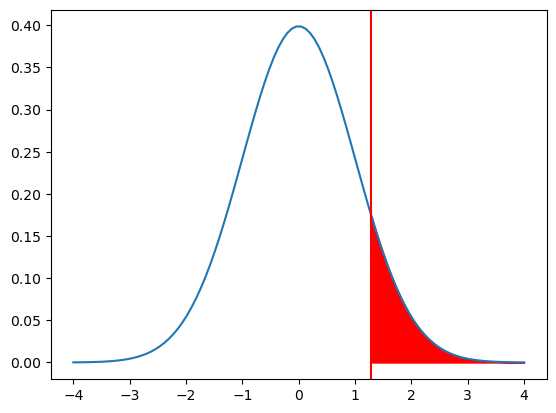

In [10]:
x = np.linspace(-4, 4, 100)
plt.plot(x, norm.pdf(x, 0, 1))
plt.axvline(x = test_stat, c = 'r')
x1 = np.linspace(test_stat, 4, 50)
plt.fill_between(x1, norm.pdf(x1, 0, 1), color='r')
plt.show()

In [11]:
# calculate the p-value
1 - norm.cdf(test_stat)

0.09851852092578695

### Insight

As the p-value ~0.098 is greater than level of significance, we can not reject the null hypothesis. Thus, we do not have enough statistical evidence to say that the mean delivery time of a product is greater than 5 days.

### Key Takeaway

* We get the same result by using both the Rejection Region and p-value approach that the manager does not have enough statistical evidence to say that the mean delivery time of a product is greater than 5 days.

# **One-tailed and Two-tailed Tests**

A soft-drink manufacturer's most selling product is 600 ml coke with a standard deviation of 50 ml.

A customer would like to test whether there is at least 600 ml coke in the bottle. He doubts that the amount of coke in the bottle is less than 600 ml.

The null hypothesis formed by the customer is

>$H_0: \mu = 600$

against the alternative hypothesis

> $H_a: \mu < 600$

However, the quality control team wants exactly 600 ml coke in the bottle. The team wants to ensure that the amount of coke in the bottle is not different from 600 ml.

The null hypothesis formed by the quality control team is

>$H_0: \mu = 600$

against the alternative hypothesis

> $H_a: \mu \neq 600$

The choice of one-sided vs two-sided alternative hypothesis depends on the nature of the problem.

### Two-tailed Test

The mean amount of coke in a bottle is 600 ml with a standard deviation of 50 ml.

We have collected 36 randomly sampled bottles. The mean amount of coke in the 36 samples is 580 ml.

We will test whether the amount of coke in the bottle is different from 600 ml using 0.05 level of significance.

### Assumptions of Z-test

*   Samples are drawn from a normal distribution - Since the sample size is 36(which is > 30), Central Limit Theorem states that the distribution of sample means will be normal. If the sample size was less than 30, we would have been able to apply the Z test if we knew that the population distribution was normal.  
*   Observations are from a simple random sample - we are informed that you have collected a simple random sample.
*   Standard deviation is known - Yes


Voila! We can use Z-test for this problem.

### Finding test statistic

In [12]:
# setting the values of population mean and standard deviation to 600 and 50 respectively
mu, sigma = 600, 50

# setting the value of sample mean to 580
x_bar = 580

# calculating the test statistic
test_stat = (x_bar - mu) / (sigma/np.sqrt(36))
test_stat

-2.4

### Rejection region approach for the two-tailed test

The Z test statistic follows a standard normal distribution. The Z values lying at the left and right end of the distribution give strong evidence against the null hypothesis. To find the rejection region, we will find the values of Z (called critical values) that give an area of $\alpha/2$ to both the left and right end.

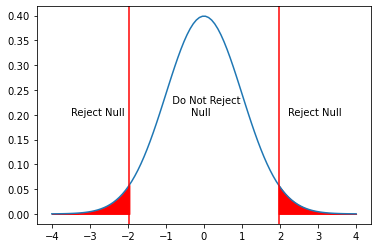

In [12]:
# importing the required function
from scipy.stats import norm

# finding the critical values
critical_val1 = norm.ppf(1-(0.05/2))
critical_val2 = norm.ppf(0.05/2)

# plotting the rejection and acceptance region to better visualize the calculations
x = np.linspace(-4, 4, 100)
plt.plot(x, norm.pdf(x, 0, 1))
plt.axvline(x = critical_val1, c = 'r')
x1 = np.linspace(critical_val1, 4, 50)
plt.fill_between(x1, norm.pdf(x1, 0, 1), color='r')
plt.axvline(x = critical_val2, c = 'r')
x1 = np.linspace(-4, critical_val2, 50)
plt.fill_between(x1, norm.pdf(x1, 0, 1), color='r')
plt.annotate('Reject Null', (2.2, 0.20))
plt.annotate('Reject Null', (-3.5, 0.20))
plt.annotate('  Do Not Reject\n        Null', (-1, 0.20))
plt.show()

As our test statistic (~-2.4) lies in the rejection region, we can reject the null hypothesis. Thus, we have enough statistical evidence to say that the amount of coke in the bottle is different from 600 ml.

### One-tailed Test

It is known that the mean amount of coke in a bottle is 600 ml with a standard deviation of 50 ml. Suppose you are a customer who wants to test whether the amount of coke in the bottle is less than 600 ml.

We have have collected 36 randomly sampled bottles. The mean amount of coke in the 36 samples is 580 ml.

Let us determine if we have enough statistical evidence for it.

### Finding the test statistic and rejection region

In [13]:
# setting the values of population mean and standard deviation to 600 and 50 respectively
mu, sigma = 600, 50

# setting the value of sample mean to 580
x_bar = 580

# calculating the test statistic
test_stat = (x_bar - mu) / (sigma/np.sqrt(36))
test_stat

-2.4

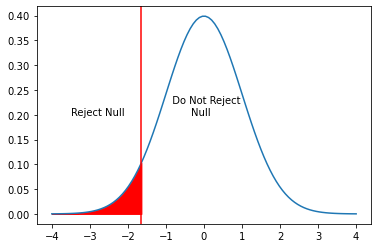

In [14]:
# import the required function
from scipy.stats import norm

# find the critical value
critical_val = norm.ppf(0.05)

x = np.linspace(-4, 4, 100)
plt.plot(x, norm.pdf(x, 0, 1))
plt.axvline(x = critical_val, c = 'r')
x1 = np.linspace(-4, critical_val, 50)
plt.fill_between(x1, norm.pdf(x1, 0, 1), color='r')
plt.annotate('Reject Null', (-3.5, 0.20))
plt.annotate('  Do Not Reject\n        Null', (-1, 0.20))
plt.show()

As our test statistic (~-2.4) lies in the rejection region, we can reject the null hypothesis. Thus, we have enough statistical evidence to say that the amount of coke in the bottle is less than from 600 ml.

### Key Takeaways

* In one-tailed test, we consider the difference only in one direction. However, in two-tailed test, we are interested to know the direction of the difference. 